In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [2]:
gdp_per_capita = pd.read_csv("../Resources/gdp_per_capita.csv")
gdp_per_capita.head()

,Series Name,Series Code,Country Name,Country Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Austria,AUT,51442.276246,48564.917335,50731.127254,51786.377175,44195.817595,45307.587862,47429.158456,51466.556563,50070.403348,48809.226876,53637.705711,52131.446659
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Canada,CAN,52223.696112,52669.089963,52635.174958,50955.998323,43596.135537,42315.603706,45129.429298,46547.795182,46374.152752,43349.677856,52358.621641,54966.488836
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Chile,CHL,14628.572457,15406.492836,15833.275919,14666.343117,13569.948127,13785.687598,15045.527851,15795.708141,14627.145016,13165.386343,16247.401015,15355.506497
3,GDP per capita (current US$),NY.GDP.PCAP.CD,Denmark,DNK,61753.647132,58507.508052,61191.193704,62548.984733,53254.856370,54663.998372,57610.098180,61591.928870,59592.980689,60915.424400,68007.756673,66983.132002
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Estonia,EST,17487.804783,17403.205325,19056.001923,20261.066730,17402.037613,18295.342932,20437.765377,23165.849479,23424.484707,23595.243684,27943.701220,28332.629092


In [3]:
gdp_per_capita.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')

In [4]:
pd.options.display.max_rows = None

In [5]:
gdp_per_capita_reduced = gdp_per_capita[['Country Name',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']]

gdp_per_capita_reduced = gdp_per_capita_reduced.rename(columns={'2011 [YR2011]' : '2011', '2012 [YR2012]' : '2012', '2013 [YR2013]' : '2013', '2014 [YR2014]' : '2014',
       '2015 [YR2015]': '2015', '2016 [YR2016]' : '2016', '2017 [YR2017]' : '2017', '2018 [YR2018]' : '2018',
       '2019 [YR2019]' : '2019', '2020 [YR2020]' : '2020', '2021 [YR2021]' : '2021'})

gdp_per_capita_reduced

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Austria,51442.276246,48564.917335,50731.127254,51786.377175,44195.817595,45307.587862,47429.158456,51466.556563,50070.403348,48809.226876,53637.705711
1,Canada,52223.696112,52669.089963,52635.174958,50955.998323,43596.135537,42315.603706,45129.429298,46547.795182,46374.152752,43349.677856,52358.621641
2,Chile,14628.572457,15406.492836,15833.275919,14666.343117,13569.948127,13785.687598,15045.527851,15795.708141,14627.145016,13165.386343,16247.401015
3,Denmark,61753.647132,58507.508052,61191.193704,62548.984733,53254.856370,54663.998372,57610.098180,61591.928870,59592.980689,60915.424400,68007.756673
4,Estonia,17487.804783,17403.205325,19056.001923,20261.066730,17402.037613,18295.342932,20437.765377,23165.849479,23424.484707,23595.243684,27943.701220
5,France,43846.466076,40870.852365,42602.717965,43068.548724,36652.922305,37062.533572,38781.049487,41557.854859,40494.898294,39055.282928,43658.978978
6,Germany,46705.895796,43855.854466,46298.922918,48023.869985,41103.256436,42136.120791,44652.589172,47939.278288,46793.686762,46772.825351,51203.554473
7,Iceland,47714.592231,45995.547879,49804.982998,54576.744815,52951.681511,61987.926362,72010.149032,74452.189073,68403.144810,58813.796983,68594.008104
8,Ireland,52183.132931,49054.697434,51546.354763,55643.059434,62053.984438,62895.911124,69970.948915,79250.387852,80927.074671,85420.190856,100172.079253
9,Italy,38649.639484,35051.521270,35560.081406,35565.721377,30242.386135,30960.731509,32406.720315,34622.169666,33673.750963,31918.693493,35770.049612


In [6]:
gdp_per_capita_clean = gdp_per_capita_reduced.dropna(how='any')
gdp_per_capita_clean

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Austria,51442.276246,48564.917335,50731.127254,51786.377175,44195.817595,45307.587862,47429.158456,51466.556563,50070.403348,48809.226876,53637.705711
1,Canada,52223.696112,52669.089963,52635.174958,50955.998323,43596.135537,42315.603706,45129.429298,46547.795182,46374.152752,43349.677856,52358.621641
2,Chile,14628.572457,15406.492836,15833.275919,14666.343117,13569.948127,13785.687598,15045.527851,15795.708141,14627.145016,13165.386343,16247.401015
3,Denmark,61753.647132,58507.508052,61191.193704,62548.984733,53254.856370,54663.998372,57610.098180,61591.928870,59592.980689,60915.424400,68007.756673
4,Estonia,17487.804783,17403.205325,19056.001923,20261.066730,17402.037613,18295.342932,20437.765377,23165.849479,23424.484707,23595.243684,27943.701220
5,France,43846.466076,40870.852365,42602.717965,43068.548724,36652.922305,37062.533572,38781.049487,41557.854859,40494.898294,39055.282928,43658.978978
6,Germany,46705.895796,43855.854466,46298.922918,48023.869985,41103.256436,42136.120791,44652.589172,47939.278288,46793.686762,46772.825351,51203.554473
7,Iceland,47714.592231,45995.547879,49804.982998,54576.744815,52951.681511,61987.926362,72010.149032,74452.189073,68403.144810,58813.796983,68594.008104
8,Ireland,52183.132931,49054.697434,51546.354763,55643.059434,62053.984438,62895.911124,69970.948915,79250.387852,80927.074671,85420.190856,100172.079253
9,Italy,38649.639484,35051.521270,35560.081406,35565.721377,30242.386135,30960.731509,32406.720315,34622.169666,33673.750963,31918.693493,35770.049612


In [7]:
gdp_per_capita_2020 = gdp_per_capita_clean[['Country Name', '2020']]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(columns={'2020' : '2020 GDP Per Capita (Current US $)'})
gdp_per_capita_2020

,Country Name,2020 GDP Per Capita (Current US $)
0,Austria,48809.226876
1,Canada,43349.677856
2,Chile,13165.386343
3,Denmark,60915.424400
4,Estonia,23595.243684
5,France,39055.282928
6,Germany,46772.825351
7,Iceland,58813.796983
8,Ireland,85420.190856
9,Italy,31918.693493


In [8]:
health_exp_per_cap = pd.read_csv('../Resources/health_exp_per_capita.csv')
health_exp_per_cap.head()

,Series Name,Series Code,Country Name,Country Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Austria,AUT,5167.817871,4966.095703,5235.341309,5393.602051,4612.824219,4709.875977,4938.919922,5337.218262,5262.054199,5585.088379,6491.12207031,..
1,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Canada,CAN,5437.852051,5541.577148,5484.807617,5231.947754,4679.976074,4668.236328,4900.668945,5052.677734,5083.725586,5619.416016,6086.07519531,..
2,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Chile,CHL,994.666077,1081.460815,1183.620850,1150.061646,1133.279785,1179.733765,1367.716431,1457.272705,1369.484009,1278.178833,1478.8293457,..
3,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Denmark,DNK,6438.212402,6168.339355,6334.415527,6466.897949,5531.878906,5624.329102,5834.020508,6232.721680,6058.830078,6438.393066,7375.15136719,..
4,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Estonia,EST,1015.968262,1013.314209,1144.646851,1287.761230,1156.202881,1226.085938,1350.126465,1553.433594,1598.837524,1787.866577,2035.61999512,..


In [9]:
health_exp_per_cap.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')

In [10]:
health_per_capita_reduced = health_exp_per_cap[['Country Name',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']]

health_per_capita_reduced = health_per_capita_reduced.rename(columns={'2011 [YR2011]' : '2011', '2012 [YR2012]' : '2012', '2013 [YR2013]' : '2013', '2014 [YR2014]' : '2014',
       '2015 [YR2015]': '2015', '2016 [YR2016]' : '2016', '2017 [YR2017]' : '2017', '2018 [YR2018]' : '2018',
       '2019 [YR2019]' : '2019', '2020 [YR2020]' : '2020', '2021 [YR2021]' : '2021'})

health_per_capita_reduced

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Austria,5167.817871,4966.095703,5235.341309,5393.602051,4612.824219,4709.875977,4938.919922,5337.218262,5262.054199,5585.088379,6491.12207031
1,Canada,5437.852051,5541.577148,5484.807617,5231.947754,4679.976074,4668.236328,4900.668945,5052.677734,5083.725586,5619.416016,6086.07519531
2,Chile,994.666077,1081.460815,1183.620850,1150.061646,1133.279785,1179.733765,1367.716431,1457.272705,1369.484009,1278.178833,1478.8293457
3,Denmark,6438.212402,6168.339355,6334.415527,6466.897949,5531.878906,5624.329102,5834.020508,6232.721680,6058.830078,6438.393066,7375.15136719
4,Estonia,1015.968262,1013.314209,1144.646851,1287.761230,1156.202881,1226.085938,1350.126465,1553.433594,1598.837524,1787.866577,2035.61999512
5,France,4931.877930,4644.595703,4888.469727,4978.559570,4199.065918,4262.223633,4411.711426,4668.880859,4508.341309,4768.727051,..
6,Germany,5037.508789,4765.694824,5099.888672,5307.377930,4624.625000,4742.963867,5064.843262,5503.997070,5478.102539,5930.332031,6503.35644531
7,Iceland,3910.575439,3759.893555,4068.558838,4487.530273,4269.933594,5015.732910,5944.971680,6233.915527,5865.231445,5636.935059,6636.00195313
8,Ireland,5558.296875,5222.044922,5328.579102,5329.980469,4561.389160,4709.168457,5010.256348,5484.221191,5430.997070,6092.176758,6700.17871094
9,Italy,3392.012695,3086.303223,3149.242676,3154.275879,2675.671631,2699.732910,2809.721436,3002.761230,2910.627930,3057.042480,3351.47875977


In [11]:
health_per_capita_clean = health_per_capita_reduced.dropna(how='any')
health_per_capita_clean

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Austria,5167.817871,4966.095703,5235.341309,5393.602051,4612.824219,4709.875977,4938.919922,5337.218262,5262.054199,5585.088379,6491.12207031
1,Canada,5437.852051,5541.577148,5484.807617,5231.947754,4679.976074,4668.236328,4900.668945,5052.677734,5083.725586,5619.416016,6086.07519531
2,Chile,994.666077,1081.460815,1183.620850,1150.061646,1133.279785,1179.733765,1367.716431,1457.272705,1369.484009,1278.178833,1478.8293457
3,Denmark,6438.212402,6168.339355,6334.415527,6466.897949,5531.878906,5624.329102,5834.020508,6232.721680,6058.830078,6438.393066,7375.15136719
4,Estonia,1015.968262,1013.314209,1144.646851,1287.761230,1156.202881,1226.085938,1350.126465,1553.433594,1598.837524,1787.866577,2035.61999512
5,France,4931.877930,4644.595703,4888.469727,4978.559570,4199.065918,4262.223633,4411.711426,4668.880859,4508.341309,4768.727051,..
6,Germany,5037.508789,4765.694824,5099.888672,5307.377930,4624.625000,4742.963867,5064.843262,5503.997070,5478.102539,5930.332031,6503.35644531
7,Iceland,3910.575439,3759.893555,4068.558838,4487.530273,4269.933594,5015.732910,5944.971680,6233.915527,5865.231445,5636.935059,6636.00195313
8,Ireland,5558.296875,5222.044922,5328.579102,5329.980469,4561.389160,4709.168457,5010.256348,5484.221191,5430.997070,6092.176758,6700.17871094
9,Italy,3392.012695,3086.303223,3149.242676,3154.275879,2675.671631,2699.732910,2809.721436,3002.761230,2910.627930,3057.042480,3351.47875977


In [12]:
health_per_capita_2020 = health_per_capita_clean[['Country Name', '2020']]
health_per_capita_2020

,Country Name,2020
0,Austria,5585.088379
1,Canada,5619.416016
2,Chile,1278.178833
3,Denmark,6438.393066
4,Estonia,1787.866577
5,France,4768.727051
6,Germany,5930.332031
7,Iceland,5636.935059
8,Ireland,6092.176758
9,Italy,3057.042480


In [13]:
gdp_vs_health_2020 = pd.merge(gdp_per_capita_2020, health_per_capita_2020, on='Country Name')
gdp_vs_health_2020 = gdp_vs_health_2020.rename(columns={ '2020 GDP Per Capita (Current US $)' : 'GDP Per Capita (Current US $)' ,'2020' : 'Health expenditure per capita (current US$)'})

gdp_vs_health_2020

,Country Name,GDP Per Capita (Current US $),Health expenditure per capita (current US$)
0,Austria,48809.226876,5585.088379
1,Canada,43349.677856,5619.416016
2,Chile,13165.386343,1278.178833
3,Denmark,60915.424400,6438.393066
4,Estonia,23595.243684,1787.866577
5,France,39055.282928,4768.727051
6,Germany,46772.825351,5930.332031
7,Iceland,58813.796983,5636.935059
8,Ireland,85420.190856,6092.176758
9,Italy,31918.693493,3057.042480


In [14]:
gdp_vs_health_sorted =gdp_vs_health_2020.sort_values(by=['Health expenditure per capita (current US$)'])

gdp_vs_health_sorted

,Country Name,GDP Per Capita (Current US $),Health expenditure per capita (current US$)
12,Poland,15816.820402,1025.984863
2,Chile,13165.386343,1278.178833
4,Estonia,23595.243684,1787.866577
13,Slovenia,25545.241003,2417.208740
9,Italy,31918.693493,3057.042480
5,France,39055.282928,4768.727051
16,United Kingdom,40318.416923,4926.631348
0,Austria,48809.226876,5585.088379
1,Canada,43349.677856,5619.416016
7,Iceland,58813.796983,5636.935059


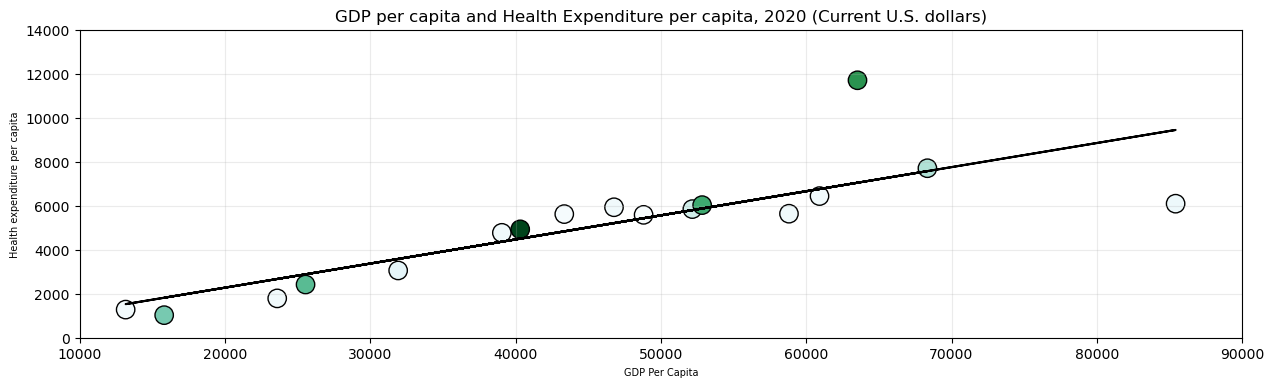

In [15]:
x_values = gdp_vs_health_2020['GDP Per Capita (Current US $)']
y_values = gdp_vs_health_2020['Health expenditure per capita (current US$)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


colors=[1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420]

#sizes = [100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420]

plt.figure(figsize=(15,4))

plt.scatter(x_values,y_values, c=colors, cmap='BuGn', 
            s= 175, edgecolor='black', linewidth= 1, alpha=1) 
plt.plot(x_values, regress_values, "k-")

plt.xlim(10000, 90000)
plt.ylim(0, 14000)

plt.xlabel('GDP Per Capita', fontsize=7)
plt.ylabel('Health expenditure per capita', fontsize=7)
plt.title('GDP per capita and Health Expenditure per capita, 2020 (Current U.S. dollars)')
plt.grid(alpha=.25)
plt.show()

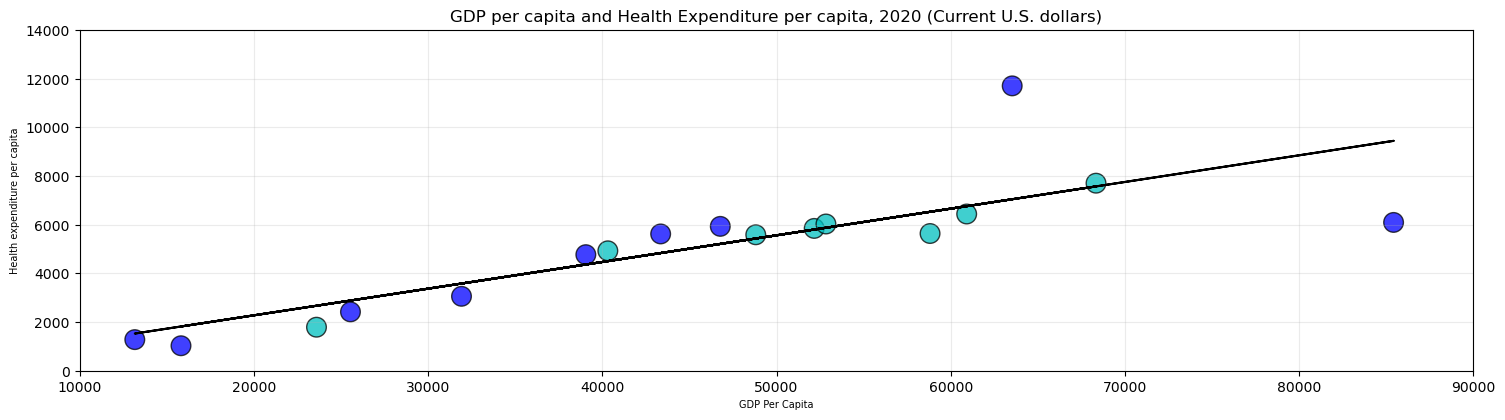

In [16]:
x_values = gdp_vs_health_2020['GDP Per Capita (Current US $)']
y_values = gdp_vs_health_2020['Health expenditure per capita (current US$)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



categories = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0 ])
# assign colormap
colormap = np.array(['c', 'b', 'm'])
plt.figure(figsize=(15,4))
plt.scatter(x_values,y_values, c=colormap[categories], s=200, edgecolor='black', linewidth= 1, alpha=0.75) 
plt.plot(x_values,regress_values,"k-",)

plt.xlim(10000,90000)
plt.ylim(0,14000)
plt.tight_layout()

plt.xlabel('GDP Per Capita', fontsize=7)
plt.ylabel('Health expenditure per capita', fontsize=7)
plt.title('GDP per capita and Health Expenditure per capita, 2020 (Current U.S. dollars)')
plt.grid(alpha=.25)
plt.show()



In [17]:
health_per_cap_avg = health_per_capita_2020.loc[health_per_capita_2020['Country Name']!= "United States",:]

health_per_cap_avg

,Country Name,2020
0,Austria,5585.088379
1,Canada,5619.416016
2,Chile,1278.178833
3,Denmark,6438.393066
4,Estonia,1787.866577
5,France,4768.727051
6,Germany,5930.332031
7,Iceland,5636.935059
8,Ireland,6092.176758
9,Italy,3057.042480


In [18]:
health_per_cap_avg = health_per_cap_avg["2020"].mean()
health_per_cap_avg



4633.9087066662505

In [19]:
new_row = {'Country Name' : 'Comparable Country Agerage', '2020' :4633.9087066662505}

health_per_capita_2020.loc[len(health_per_capita_2020)] = new_row

C:\Users\chris\AppData\Local\Temp\ipykernel_6768\4259250626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_per_capita_2020.loc[len(health_per_capita_2020)] = new_row


In [20]:
health_per_capita_2020

,Country Name,2020
0,Austria,5585.088379
1,Canada,5619.416016
2,Chile,1278.178833
3,Denmark,6438.393066
4,Estonia,1787.866577
5,France,4768.727051
6,Germany,5930.332031
7,Iceland,5636.935059
8,Ireland,6092.176758
9,Italy,3057.042480


In [22]:
health_per_capita_2020 = health_per_capita_2020.sort_values(by='2020')


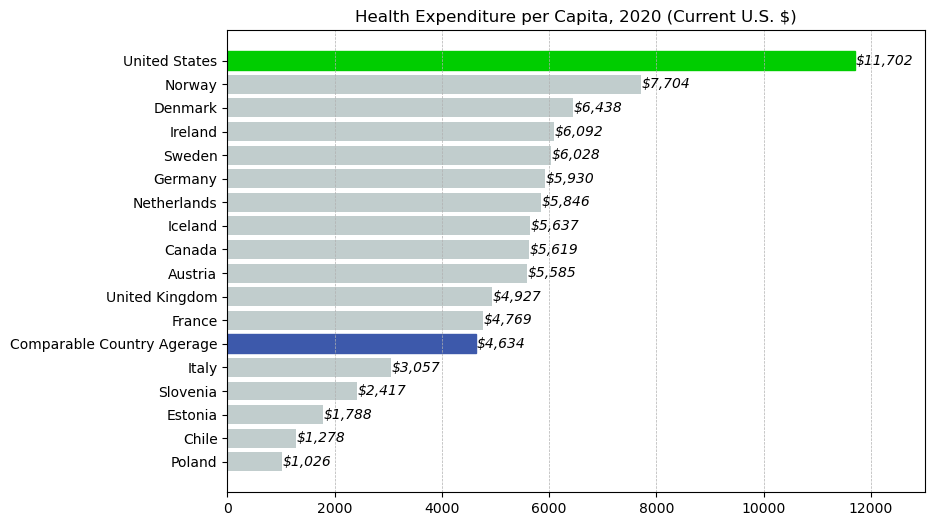

In [34]:
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
ret = ax1.barh(health_per_capita_2020['Country Name'], round(health_per_capita_2020['2020'], 2), color='#C1CDCD')
ret[5].set_color('#3D59AB')
ret[17].set_color('#00CD00')

ax1.xaxis.grid(linestyle = '--', linewidth=0.5)
for pY, pX in enumerate(health_per_capita_2020['2020']):
    ax1.annotate("${:,.0f}".format(pX) , xy=(pX+10, pY), fontstyle = 'italic' , va = 'center')
ax1.set_xlim(0, 13000)
ax1.set_title("Health Expenditure per Capita, 2020 (Current U.S. $)")

plt.show()

In [43]:
us_health_spending = health_per_capita_clean.loc[health_per_capita_clean['Country Name'] == "United States" , :]

us_health_spending.set_index('Country Name')



,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,
United States,8020.439941,8272.958008,8431.182617,8824.776367,9243.621094,9594.743164,9904.237305,10284.554688,10661.02832,11702.40918,..


In [44]:
us_gdp_spending = gdp_per_capita_clean.loc[gdp_per_capita_clean['Country Name']== 'United States', :]
us_gdp_spending.set_index('Country Name')

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,
United States,50065.966504,51784.418574,53291.127689,55123.849787,56762.729452,57866.744934,59907.754261,62823.309438,65120.394663,63528.634303,70219.472454
